# Vizualise individual models from the sea level projections

- Read annual dynamic sea level from CMIP5 as computed for Erwin's project
- Add the mean value of other sea level contributors
- Compare the result with observations from the 6 tide gauges of the ZSM

In [35]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/dewilebars/Projects/SLBudget/code/')
import SeaLevelContrib as slc

In [36]:
data_path = '../../Data_Proj/Data_CMIP5/CorrectedZOS_TS_yearly/'

In [37]:
#List of model names
# Removed "MPI-ESM-LR" and "MPI-ESM-MR" because of strange results
sce = 'rcp45'

if sce == 'rcp45':
    MOD = ["ACCESS1-0","BCC-CSM1-1","CanESM2","CNRM-CM5","CSIRO-Mk3-6-0",
           "GFDL-ESM2G","GFDL-ESM2M","GISS-E2-R","HadGEM2-CC","HadGEM2-ES",
           "inmcm4","IPSL-CM5A-LR", "IPSL-CM5A-MR","MIROC5","MIROC-ESM-CHEM",
           "MIROC-ESM","MRI-CGCM3","NorESM1-ME","NorESM1-M"]
elif sce == 'rcp85':
     MOD = ["ACCESS1-0","BCC-CSM1-1","CanESM2","CSIRO-Mk3-6-0",
           "GFDL-ESM2G","GFDL-ESM2M","GISS-E2-R","HadGEM2-CC","HadGEM2-ES",
           "inmcm4","IPSL-CM5A-LR", "IPSL-CM5A-MR","MIROC5","MIROC-ESM-CHEM",
           "MIROC-ESM","MRI-CGCM3","NorESM1-ME","NorESM1-M"]   

ref_period = [1986,2005]
area = 'dutch_coast'
if area == 'dutch_coast':
    lon_min, lon_max = 3, 7
    lat_min, lat_max = 51, 54
elif area == 'north_sea':
    lon_min, lon_max = -2, 9
    lat_min, lat_max = 48, 60


In [38]:
def rotate_longitude(ds):
    ds = ds.roll(longitude=180, roll_coords=True)
    ds['longitude'] = np.where(ds['longitude']>180, ds['longitude']-360, ds['longitude'])
    return ds

In [39]:
odyn_df = pd.DataFrame(dict(time=np.arange(1950,2101)))
odyn_df = odyn_df.set_index('time')
for mod in MOD:
    with xr.open_dataset(data_path+'ZOS_HIST/CorrectedZOS_EXPrcp85_'+mod+'.nc') as ds:
        ds = rotate_longitude(ds)
        ds = ds.sel(time=slice(1950,2005), longitude=slice(lon_min,lon_max), latitude=slice(lat_min,lat_max))
        odyn = ds['CorrectedZOS_reg'].mean(dim=['longitude','latitude'])
    with xr.open_dataset(data_path+'ZOS_'+sce.upper()+'/CorrectedZOS_EXP'+sce+'_'+mod+'.nc') as ds:
        ds = rotate_longitude(ds)
        ds = ds.sel(longitude=slice(lon_min,lon_max), latitude=slice(lat_min,lat_max))
        odyn_sce = ds['CorrectedZOS_reg'].mean(dim=['longitude','latitude'])
    odyn_df[mod] = xr.concat([odyn, odyn_sce],dim='time').to_dataframe()
    odyn_df[mod] = odyn_df[mod] - odyn_df[mod].loc[ref_period[0]:ref_period[1]].mean()
odyn_df['mean'] = odyn_df.mean(axis=1)
odyn_df.iloc[-10:]

,ACCESS1-0,BCC-CSM1-1,CanESM2,CNRM-CM5,CSIRO-Mk3-6-0,GFDL-ESM2G,GFDL-ESM2M,GISS-E2-R,HadGEM2-CC,HadGEM2-ES,inmcm4,IPSL-CM5A-LR,IPSL-CM5A-MR,MIROC5,MIROC-ESM-CHEM,MIROC-ESM,MRI-CGCM3,NorESM1-ME,NorESM1-M,mean
time,,,,,,,,,,,,,,,,,,,,
2091,12.107668,5.268457,-1.228587,-2.311845,6.664912,3.549051,-1.219761,-1.381224,7.125948,11.993958,15.706131,18.289310,21.980940,15.532030,17.305563,18.273176,1.201171,-0.604584,-2.707386,7.660260
2092,12.855740,-1.636909,-2.934096,2.170685,10.089064,-1.045832,-0.679361,0.545872,11.505938,16.023714,13.974293,19.578014,16.758720,14.923016,18.444370,16.779240,10.107015,2.450929,1.339409,8.486833
2093,12.108264,2.305029,-2.278759,3.280090,8.317573,-4.272412,-0.530498,-1.563697,12.593375,12.466092,10.331467,19.428347,14.747007,15.743953,18.666502,17.378511,5.899398,0.018980,0.355695,7.631311
2094,7.732895,2.672508,-0.859165,7.753162,4.594270,-6.061617,-4.646117,1.485762,8.580267,12.614264,17.610096,20.627125,13.977886,14.745842,18.128298,14.103825,4.157298,-1.979825,-0.563410,7.088071
2095,9.142773,8.383405,-1.826552,2.700282,1.226723,-2.239851,-1.326492,4.370935,6.952880,6.815270,12.575956,18.671766,19.262890,13.232799,16.226364,17.573725,5.934535,-7.448877,-2.190351,6.738851
2096,16.280846,15.067065,-0.612375,5.150048,4.476470,-3.460852,-3.065430,1.598071,8.477077,11.044389,15.865108,18.329468,20.052620,12.133838,16.343035,18.715252,8.397118,0.197962,-2.538118,8.550084
2097,17.142069,8.835928,0.336433,1.696361,3.284196,0.199268,-0.022125,5.282047,9.130593,8.300938,9.661190,19.322588,13.993823,14.623868,20.149830,17.434502,2.137463,-2.647038,0.050952,7.837521
2098,13.335951,8.314051,-2.180694,1.539267,1.623319,-0.263053,0.996894,2.921496,9.841545,12.064833,12.227026,16.656902,12.451509,13.284809,18.180632,18.624783,7.577754,-1.144978,-6.515472,7.344030
2099,12.970657,14.090879,-0.982112,1.593523,0.804374,-2.293433,1.602768,-2.103319,13.031521,9.810369,10.152267,18.456528,18.323792,14.357051,19.655924,17.925358,6.691257,4.784373,-3.402929,8.182571


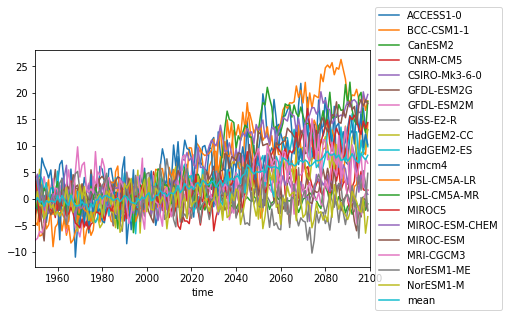

In [40]:
odyn_df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

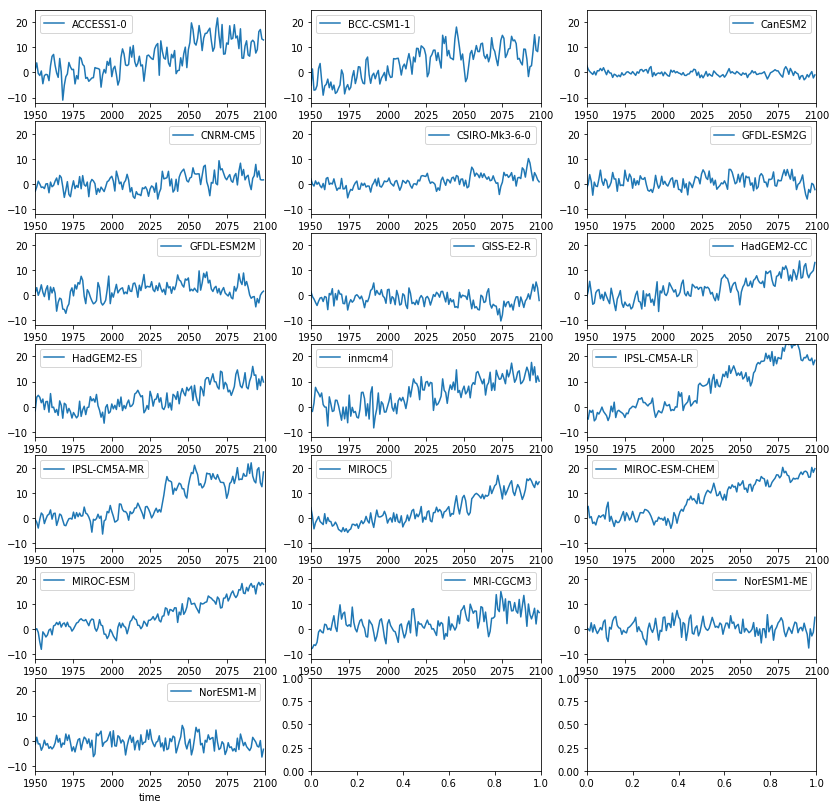

In [41]:
# Split time series in small groups
nb_cols = 3
nb_rows = int(len(MOD)/nb_cols)+1
fig, axes = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(14,14))
#axes.set_ylim([-12,25])

for idx, mod in enumerate(MOD):
    odyn_df[mod].plot(ax=axes[int(idx/nb_cols),idx%nb_cols], legend=True, ylim=[-12,25])


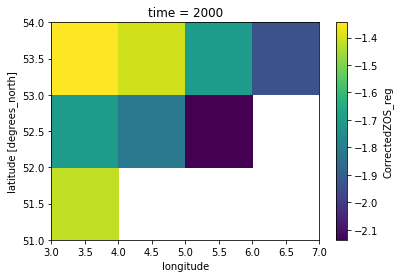

In [42]:
# Check the area
f = xr.open_dataset(data_path+'ZOS_HIST/CorrectedZOS_EXPrcp85_'+MOD[0]+'.nc')
f = f.roll(longitude=180, roll_coords=True)
f['longitude'] = np.where(f['longitude']>180, f['longitude']-360, f['longitude'])
f.CorrectedZOS_reg.sel(time=2000, longitude=slice(lon_min,lon_max), latitude=slice(lat_min,lat_max)).plot()

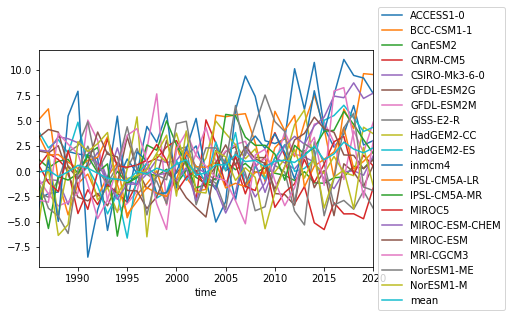

In [43]:
odyn_df.loc[1986:2020].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [44]:
# Read KNMI'14 projections
path_KNMI14 = '/Users/dewilebars/Projects/Project_ProbSLR/KNMI14/'
KNMI14_df = pd.read_csv(path_KNMI14 + 'K14_scenarios_by_year.csv')
del(KNMI14_df['year.1'])
KNMI14_df = KNMI14_df.set_index('year')

# Add subidence
subsidence = np.arange(KNMI14_df.shape[0]) * 0.045

for i in KNMI14_df.columns:
    KNMI14_df[i + '_sub'] = KNMI14_df[i] + subsidence

# Compute medians (approximatively)
KNMI14_df['low_50_sub'] = (KNMI14_df['low_05_sub'] + KNMI14_df['low_95_sub'])/2
KNMI14_df['high_50_sub'] = (KNMI14_df['high_05_sub'] + KNMI14_df['high_95_sub'])/2
    
KNMI14_df.index.names = ['time']
KNMI14_df[:10]

,low_05,low_95,high_05,high_95,low_05_sub,low_95_sub,high_05_sub,high_95_sub,low_50_sub,high_50_sub
time,,,,,,,,,,
1995,-0.2826,0.3990,-0.2826,0.3990,-0.2826,0.3990,-0.2826,0.3990,0.05820,0.05820
1996,0.1787,0.7226,0.1814,0.7251,0.2237,0.7676,0.2264,0.7701,0.49565,0.49825
1997,0.3832,1.3960,0.5654,1.5800,0.4732,1.4860,0.6554,1.6700,0.97960,1.16270
1998,0.5978,1.6610,0.9111,1.9760,0.7328,1.7960,1.0461,2.1110,1.26440,1.57855
1999,0.6499,2.0520,1.2050,2.6090,0.8299,2.2320,1.3850,2.7890,1.53095,2.08700
2000,0.7580,2.6900,1.5490,3.4850,0.9830,2.9150,1.7740,3.7100,1.94900,2.74200
2001,0.8874,3.1510,1.6750,3.9430,1.1574,3.4210,1.9450,4.2130,2.28920,3.07900
2002,1.0880,3.6320,1.8020,4.3510,1.4030,3.9470,2.1170,4.6660,2.67500,3.39150
2003,1.3860,4.0530,2.0380,4.7080,1.7460,4.4130,2.3980,5.0680,3.07950,3.73300


In [45]:
KNMI14_indiv_model_df = pd.DataFrame()
for mod in odyn_df.columns:
    KNMI14_indiv_model_df[mod] = odyn_df[mod] + KNMI14_df['low_50_sub'] - odyn_df['mean']
KNMI14_indiv_model_df = KNMI14_indiv_model_df.rename(columns={'mean':'KNMI_low_50_sub'})
KNMI14_indiv_model_df.iloc[-10:]

,ACCESS1-0,BCC-CSM1-1,CanESM2,CNRM-CM5,CSIRO-Mk3-6-0,GFDL-ESM2G,GFDL-ESM2M,GISS-E2-R,HadGEM2-CC,HadGEM2-ES,inmcm4,IPSL-CM5A-LR,IPSL-CM5A-MR,MIROC5,MIROC-ESM-CHEM,MIROC-ESM,MRI-CGCM3,NorESM1-ME,NorESM1-M,KNMI_low_50_sub
time,,,,,,,,,,,,,,,,,,,,
2091,55.132408,48.293197,41.796154,40.712896,49.689653,46.573791,41.804980,41.643516,50.150688,55.018699,58.730871,61.314051,65.005680,58.556770,60.330303,61.297916,44.225911,42.420157,40.317354,50.685
2092,55.613907,41.121259,39.824072,44.928852,52.847231,41.712335,42.078807,43.304040,54.264105,58.781881,56.732460,62.336182,59.516888,57.681183,61.202538,59.537407,52.865182,45.209096,44.097577,51.245
2093,56.251953,46.448717,41.864929,47.423778,52.461261,39.871276,43.613191,42.579992,56.737064,56.609781,54.475155,63.572035,58.890696,59.887641,62.810191,61.522200,50.043086,44.162668,44.499384,51.775
2094,52.974824,47.914436,44.382764,52.995091,49.836198,39.180312,40.595812,46.727691,53.822196,57.856192,62.852025,65.869053,59.219815,59.987771,63.370226,59.345753,49.399226,43.262104,44.678518,52.330
2095,55.338922,54.579554,44.369597,48.896431,47.422873,43.956298,44.869657,50.567084,53.149030,53.011419,58.772106,64.867916,65.459039,59.428948,62.422514,63.769874,52.130684,38.747272,44.005799,52.935
2096,61.290762,60.076981,44.397540,50.159964,49.486385,41.549064,41.944486,46.607987,53.486993,56.054305,60.875024,63.339384,65.062536,57.143754,61.352951,63.725168,53.407034,45.207877,42.471798,53.560
2097,63.374548,55.068407,46.568913,47.928840,49.516676,46.431748,46.210355,51.514527,55.363073,54.533417,55.893669,65.555067,60.226302,60.856347,66.382309,63.666981,48.369942,43.585442,46.283431,54.070
2098,60.826920,55.805020,45.310276,49.030237,49.114288,47.227917,48.487864,50.412466,57.332515,59.555802,59.717996,64.147872,59.942479,60.775779,65.671601,66.115752,55.068724,46.345991,40.975497,54.835
2099,60.208086,61.328308,46.255317,48.830952,48.041803,44.943996,48.840197,45.134109,60.268949,57.047798,57.389695,65.693956,65.561220,61.594479,66.893352,65.162786,53.928686,52.021802,43.834500,55.420


In [46]:
# Read tide gauge data
tg_id = [20, 22, 23, 24, 25, 32]
tg_df = slc.tide_gauge_obs(tg_id, interp=True)
tg_df.iloc[-10:]

,20,22,23,24,25,32,Average
time,,,,,,,
2009,12.172611,14.848387,8.513636,10.288312,7.905195,9.902721,10.605144
2010,12.372611,15.748387,7.213636,8.888312,5.705195,8.702721,9.771810
2011,12.772611,16.348387,11.913636,14.388312,12.305195,11.802721,13.255144
2012,12.072611,16.348387,10.413636,12.788312,11.005195,11.202721,12.305144
2013,10.672611,14.748387,7.513636,10.388312,6.705195,8.802721,9.805144
2014,14.472611,17.848387,10.813636,14.788312,12.005195,13.502721,13.905144
2015,14.772611,18.648387,13.813636,20.088312,16.705195,14.902721,16.488477
2016,15.072611,18.848387,11.913636,16.588312,13.005195,14.202721,14.938477
2017,16.672611,21.048387,15.813636,22.388312,17.605195,17.202721,18.455144


In [47]:
KNMI14_indiv_model_df['TG_mean'] = tg_df.Average - tg_df.Average.loc[ref_period[0]:ref_period[1]].mean()

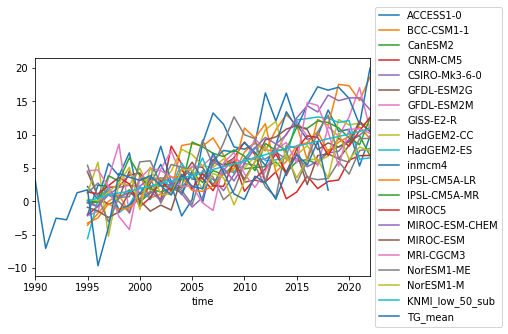

In [48]:
KNMI14_indiv_model_df.loc[1990:2022].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

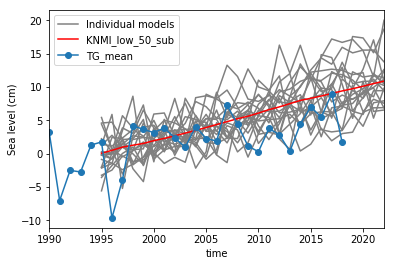

In [49]:
len_col = len(KNMI14_indiv_model_df.columns)
styles = list()
for i in range(len_col):
    styles.append('grey')

styles[-2] = 'r-'
styles[-1] = 'o-'
ax = KNMI14_indiv_model_df.loc[1990:2022].plot(style = styles)
ax.set_ylabel('Sea level (cm)')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lines, labels = ax.get_legend_handles_labels()
labels[-3] = 'Individual models'
ax.legend(lines[-3:], labels[-3:])
plt.savefig('../figures/ComparisonTGvsProjectionsWithIndividualModels_low.pdf', dpi=150)

In [50]:
# Export data
#KNMI14_indiv_model_df.loc[1990:].to_csv('../outputs/KNMI14_individual_model_time_series_high.csv')